## TL;DR
The CLT is an evolution of the Law of Large Numbers. The LLN tells us that the distribution of running averages (or equivalently, sample averages) gets tighter and tighter. The CLT, with a few more assumptions tells us what shape the distribution of running averages takes. 

**Spolier: it's a Gaussian**. The sample averages follow a normal distribution when n gets big. 

Since we now (compared to the LLN) know the distribution of the sample averages, we can choose n such that the variance in the particular average we get is small enough for whatever purpose we have in mind. Equivalently, for a fixed n, we can come up with good ways of attaching a margin of error to the particular sample average we observed.

## The Central Limit Theorem
The various versions of the CLT all say, in various ways, that if you take not-too-correlated, not-too-dependent, not-too-heavy-tailed random variables and sum them, the sum follows a normal distribution as the sequence gets longer, even if the original variables are far from normally distributed.

Forcing the variables in the sum to be independent and have finite variance is a nice special case and convergence happens pretty quickly, especially if each varaible is a draw from a particular distribution.

As with the LLN, the CLT is talking about the distribution of possible running/sample averages (i.e. the histogram of each grad sutdent's results, i.e. the sampling distribution of the mean).

As an example, let's bring back an example from the LLN notebook.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def crazy_distribution(n):
    chi = np.random.chisquare(3,n)
    exp = np.random.exponential(40,n)
    return chi*exp

First, note that the distribution itself doesn't look at all like a Gaussian.

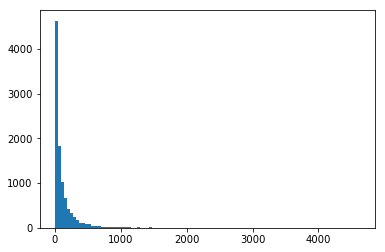

In [6]:
random_flips = crazy_distribution(10000)
plt.hist(random_flips,100)
plt.show()

However, if you squint or re-run the model a few times it looks like the individual traces at time 1000 are roughly spread like normal RVs around the true mean.

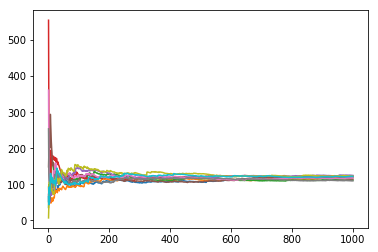

In [8]:
n=1000
n_students=10
for _ in range(n_students):
    random_flips = crazy_distribution(n)
    #cumsum is a nice numpy function for "the total so far"
    running_sum = np.cumsum(random_flips)
    #holds the denominator at each index
    sequence_lengths = np.array(range(1,n+1))
    #divide to get the overall mean
    running_means = running_sum / sequence_lengths
    plt.plot(sequence_lengths, running_means);
    #plt.xscale('log')

If we look at the histogram of lots of means at time 1000, it looks rather Gaussian.

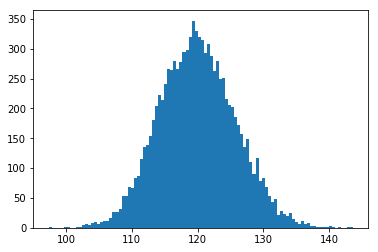

In [13]:
n=1000
n_students=10000
set_of_means=np.zeros(n_students)
for i in range(n_students):
    set_of_means[i] = np.mean(crazy_distribution(n))
plt.hist(set_of_means,100)
plt.show()

A QQ plot is an even more clearer way of showing that observed data it normally distributed. We plot the [standardized] observed values (y) against values actaully drawn from a standard normal, each in sorted order. If the distributions match, we should see the plotted points follow a line with slope 1.

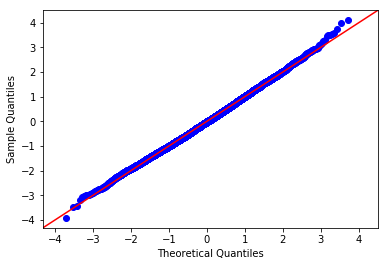

In [19]:
from statsmodels.graphics.gofplots import qqplot

standardized_means=(set_of_means-np.mean(set_of_means))/np.std(set_of_means)

qqplot(standardized_means, line="45")
plt.show()

Bam. Even though the underlying distribution is weird, the particular average an experimenter observes after 1000 samples is just a draw from a normal distribution.

### CLT gives a way of controlling the margin of error
We know the sample average any experimenter sees after n draws is normally distributed. The natural question is "what are the mean and variance of that distribution"?

In the case we've been dealing with, where all draws are from the same distribution with mean $\mu$ and variance $\sigma^2$, the sample means follow a normal with (drumroll) mean $\mu$ and variance $\frac{\sigma^2}{n}$!

That last fact is worthy of an exclamation point: the variance goes down like $\frac{1}{n}$ (and thus the standard deviation goes down like $\frac{1}{\sqrt{n}}$)

If we can estimate the variance of the underlying distribution we can start calculating how much our particular sample average might be off from the true mean. That is, even though we only observe ONE particular history above we can reason "The sample average I've seen is a draw from a normal centered at the true mean and with sd $\frac{\sigma}{\sqrt{n}}$; if I want to be within +/-.01 of the true value 95% of the time, I should set n so that $\frac{3\sigma}{\sqrt{n}}=.01$".

Ergo, the major importance of the CLT over the LLN is that the CLT allows us to do actual engineering and error tolerance, while the LLN simply says the sample average will converge eventually. That said, even the CLT is an asymptotic result. Although convergence to a Gaussian is often quite quick, distributions of the sample average at any finite n may or may not be normal yet.

However, error bounds do exist for finite sample sizes. See the notes on Hoefding's Inequality for one of them.